Libraries

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**I am conducting separate analyses for both datasets provided to me.**

**Load data**

1.   benin-malanville




In [2]:
benin_df = pd.read_csv("/content/drive/MyDrive/10Academy/benin-malanville.csv")
benin_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN


Data Quality Check

In [3]:
missing = benin_df.isnull().sum()
missing

,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


**Check for Negetive values**

In [4]:
mask = (benin_df['GHI'] >= 0) & (benin_df['DNI'] >= 0) & (benin_df['DHI'] >= 0)
if mask.all():
    print("No negative values found")
else:
    print("Negative values found")

Negative values found


Mask out positive values for ***'GHI', 'DNA' and 'DHI'***

In [5]:
positive_values = benin_df[(benin_df['GHI'] >= 0) &
                            (benin_df['DNI'] >= 0) &
                            (benin_df['DHI'] >= 0)]

benin_df = positive_values

**Check for Outliers**

In [ ]:
benin_df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

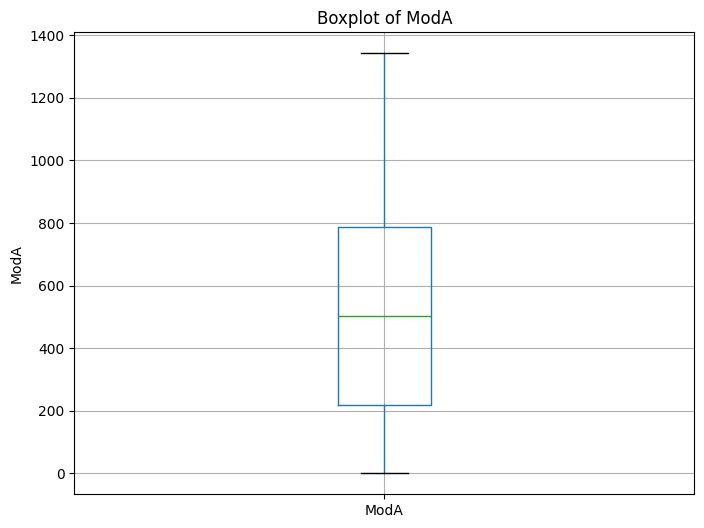

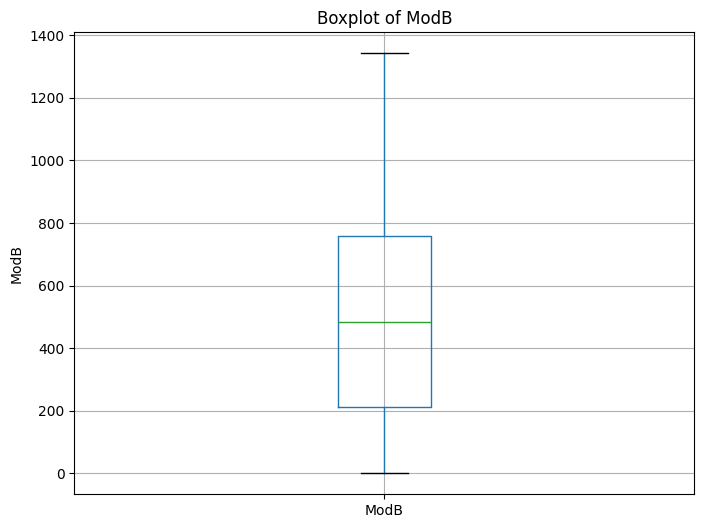

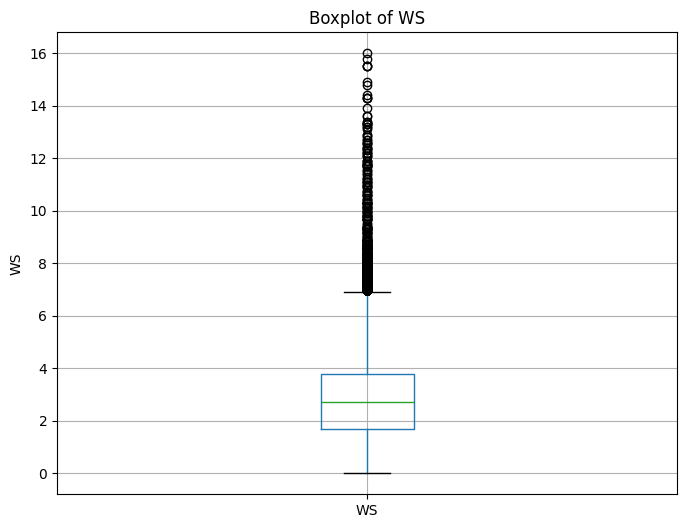

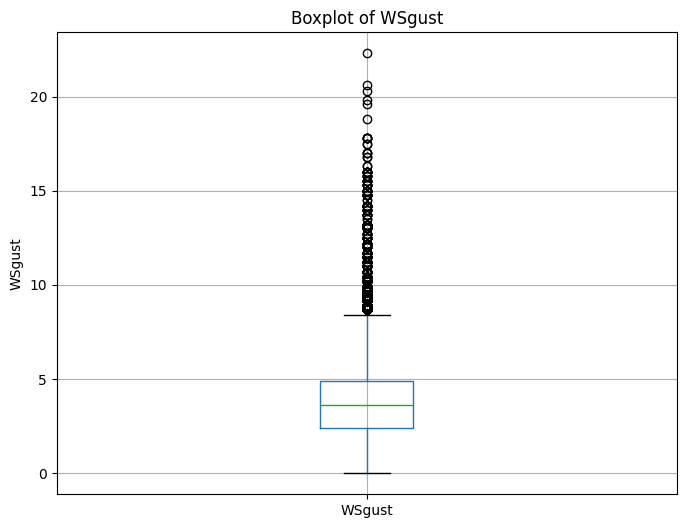

In [ ]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    benin_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Detect Outliers

In [9]:
columns = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = benin_df[columns].quantile(0.25)
Q3 = benin_df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove above
benin_df = benin_df[(benin_df[columns] >= lower_bound) & (benin_df[columns] <= upper_bound)]
# outliers = benin_df[((benin_df[columns] < lower_bound) | (benin_df[columns] > upper_bound)).any(axis=1)]


Now CHeck again

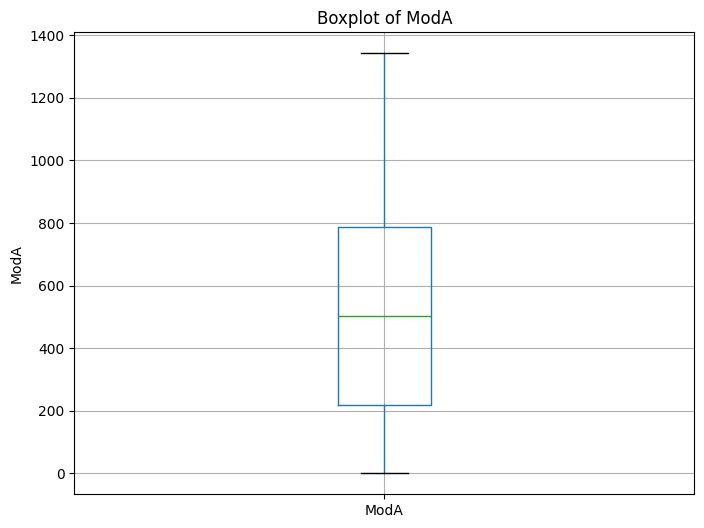

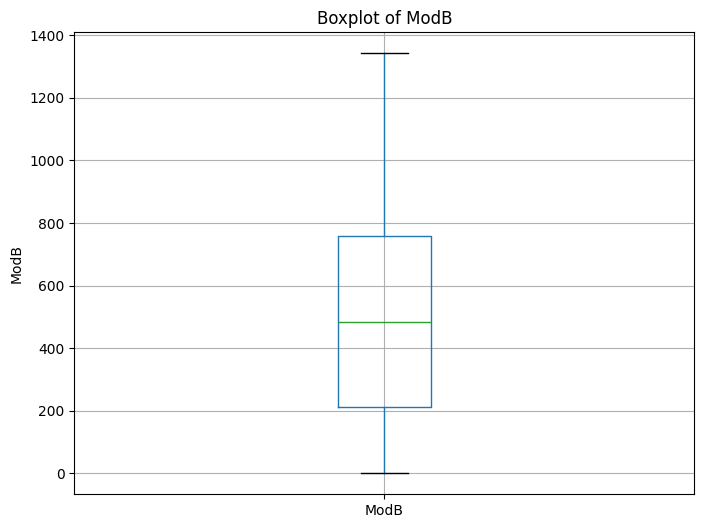

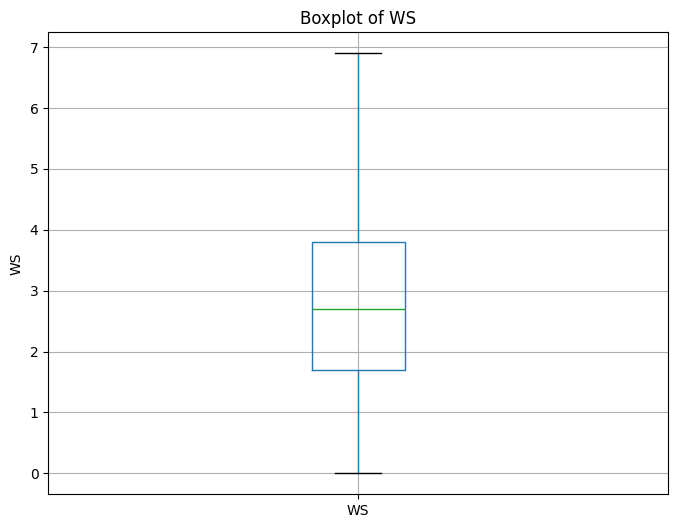

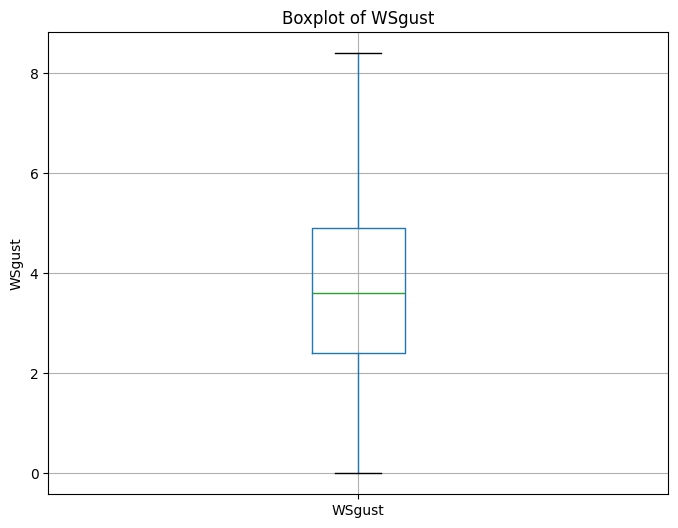

In [10]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    benin_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

**Load data**

2.   sierraleone dataset

In [11]:
sierraleone_df = pd.read_csv("/content/drive/MyDrive/10Academy/sierraleone-bumbuna.csv")
sierraleone_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


**Check Missing values**

In [13]:
missing = sierraleone_df.isnull().sum()
missing

,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


Detecting Outlier

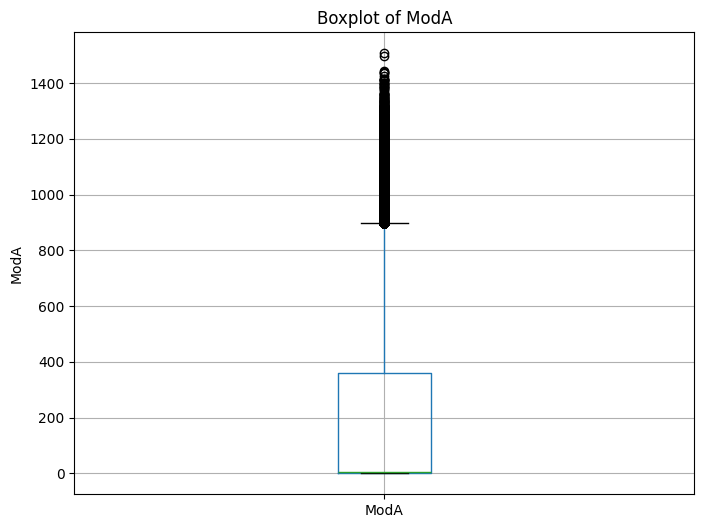

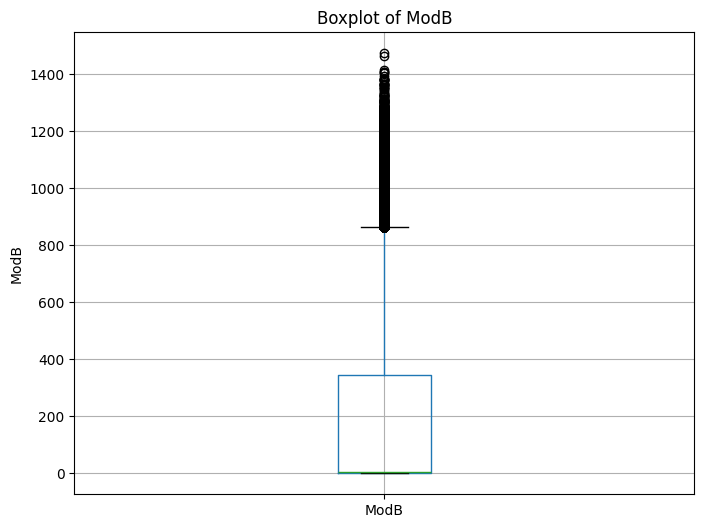

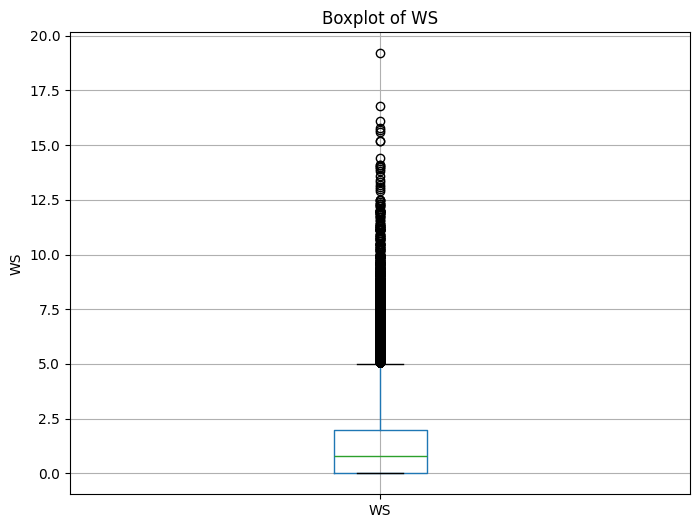

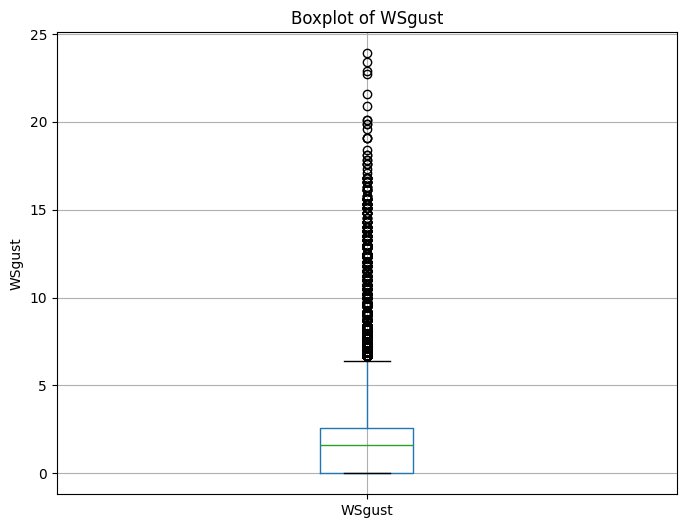

In [15]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    sierraleone_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Remove

In [18]:
columns = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = sierraleone_df[columns].quantile(0.25)
Q3 = sierraleone_df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove above
sierraleone_df = sierraleone_df[(sierraleone_df[columns] >= lower_bound) & (sierraleone_df[columns] <= upper_bound)]
# outliers = benin_df[((benin_df[columns] < lower_bound) | (benin_df[columns] > upper_bound)).any(axis=1)]


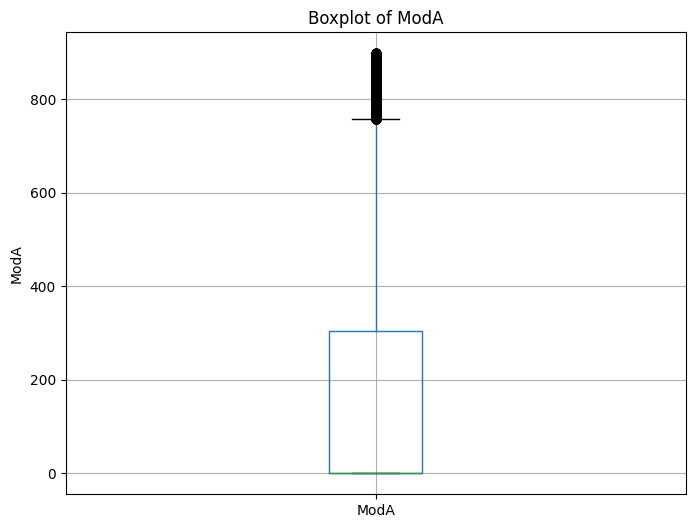

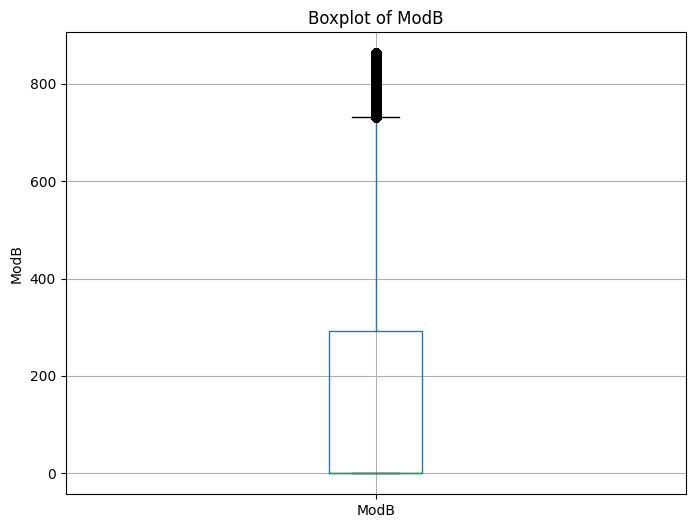

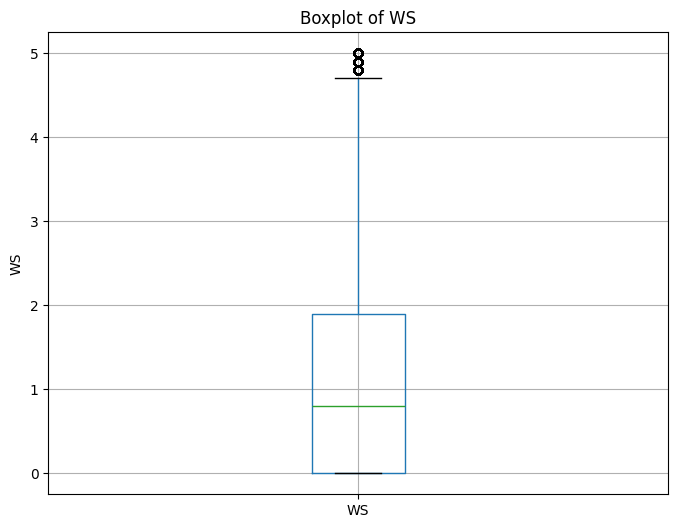

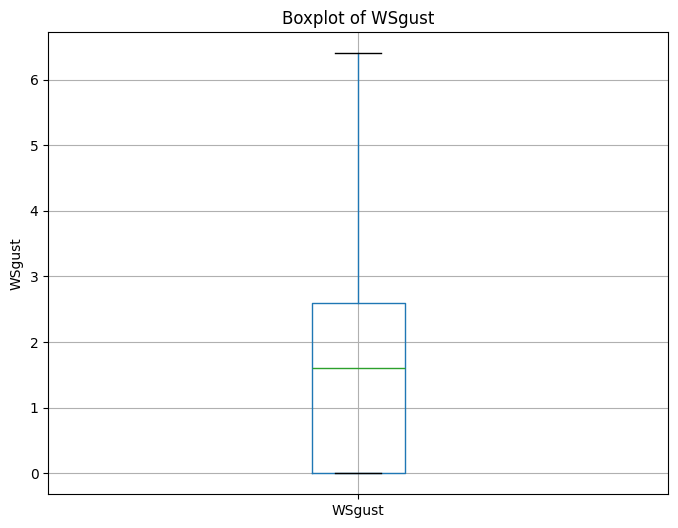

In [19]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    sierraleone_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Data load
3. Togo

In [20]:
togo_df = pd.read_csv("/content/drive/MyDrive/10Academy/togo-dapaong_qc.csv")
togo_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN


Check Mising for togo

In [21]:
missing = togo_df.isnull().sum()
missing

,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


plot boxplot to detect outliers

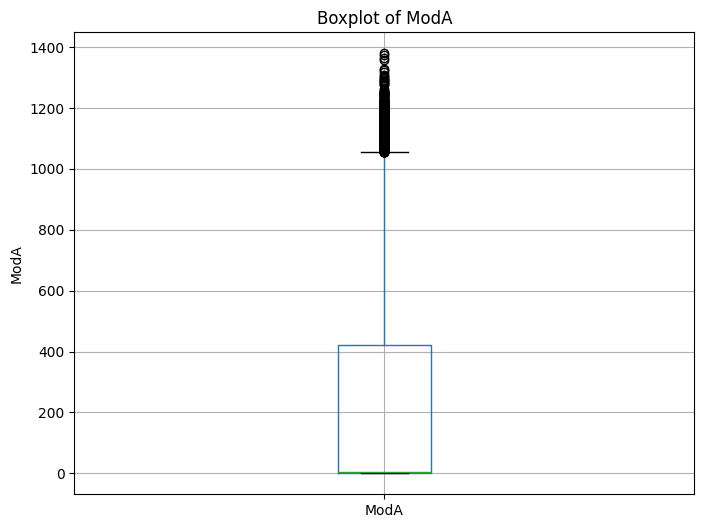

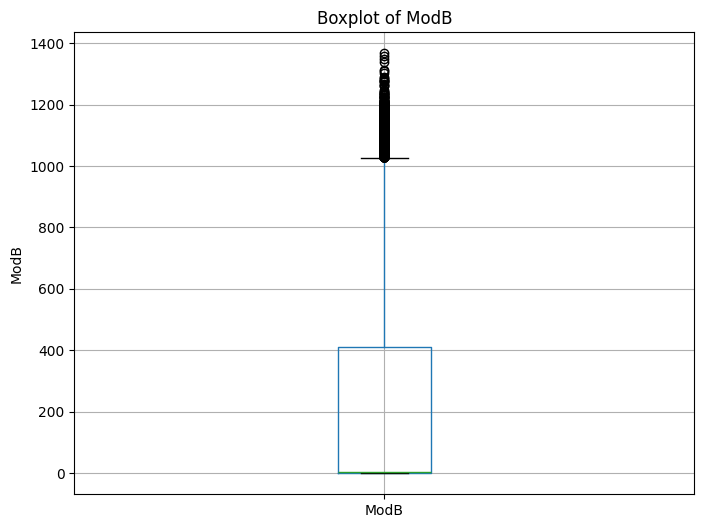

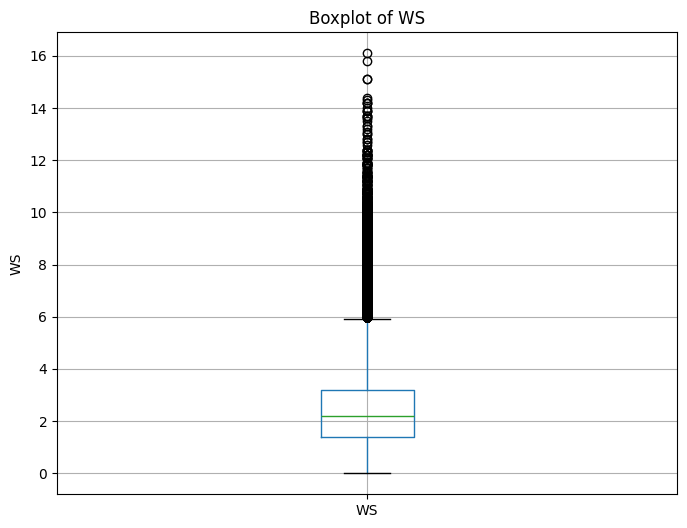

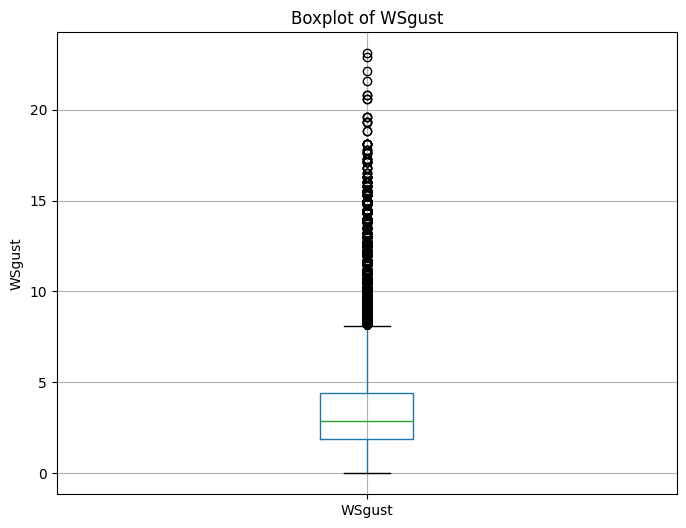

In [22]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    togo_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Remove using below

In [23]:
columns = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = togo_df[columns].quantile(0.25)
Q3 = togo_df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove above
togo_df = togo_df[(togo_df[columns] >= lower_bound) & (togo_df[columns] <= upper_bound)]
# outliers = benin_df[((benin_df[columns] < lower_bound) | (benin_df[columns] > upper_bound)).any(axis=1)]


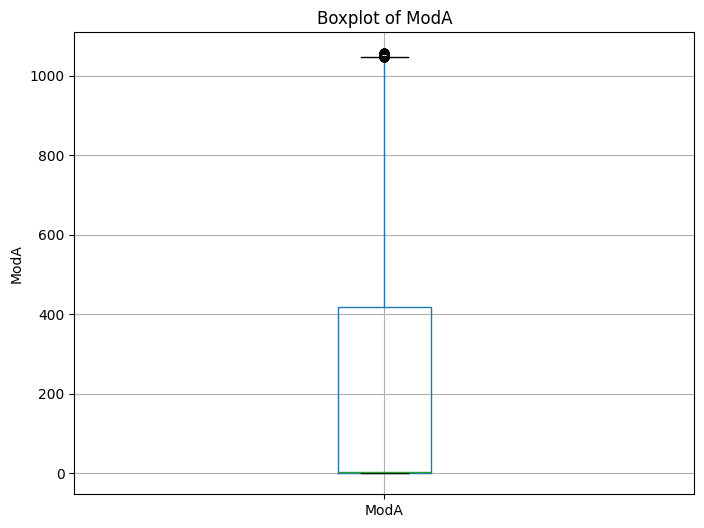

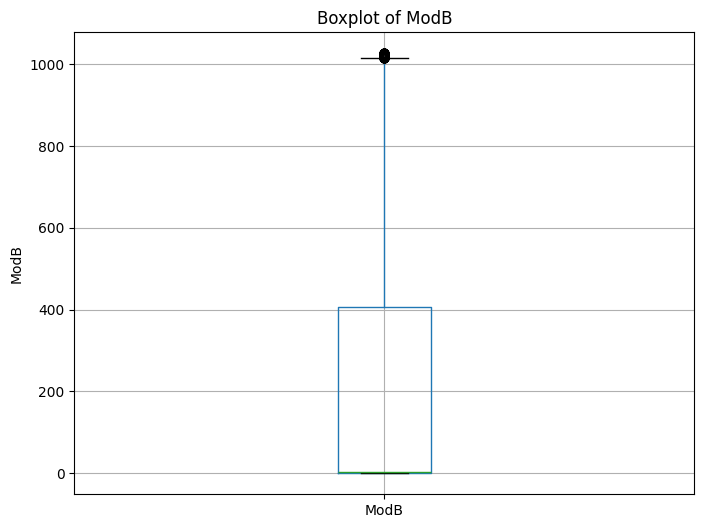

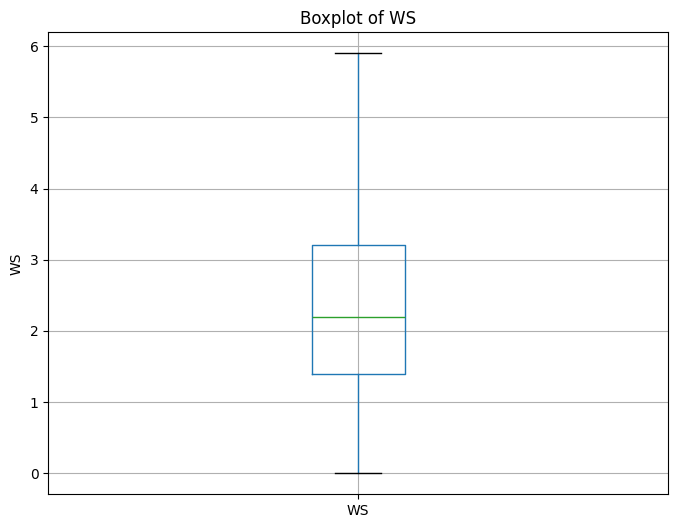

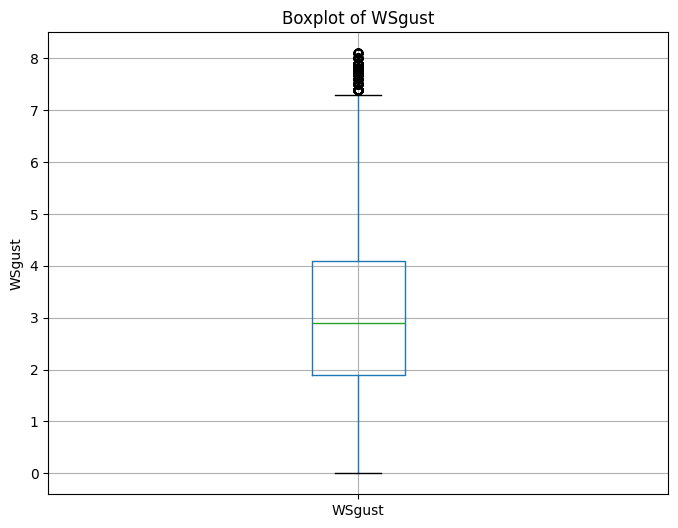

In [24]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    togo_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()